In [1]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

# # %% train test split
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
result_path = "C:\\Users\\DKici\\Documents\\PricingPromo\\Results\\Marketing_Spend_Results\\Marketing_Spend_Classification_Results\\All\\"

In [5]:
# data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\Marketing_Spend_Data\\Marketing_Spend_Weekly_with_GrossSales.csv')
data = pd.read_csv('/content/Marketing_Spend_Weekly_with_GrossSales.csv')

data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Weekly_Date,undefined_funnel,BOFU,MOFU,TOFU,undefined_category,Accessories,Appliance,Bedroom,Dining Room,Finance,Furniture,Living Room,Mattress,Office,Outdoor,WrittenSales,GrossWrittenSales,Traffic,Margin
0,2019-12-30,16935.0,18495.0,NaN,3518.0,30315.0,NaN,NaN,6849.0,453.0,NaN,NaN,742.0,368.0,220.0,NaN,2392138.46,2562146.07,13859.0,1063626.9
1,2020-01-06,19842.0,14446.0,NaN,4645.0,32552.0,NaN,NaN,4120.0,568.0,NaN,NaN,1072.0,418.0,203.0,NaN,2043289.53,2319326.72,12410.0,983523.1


In [6]:
data = data.fillna(0)
data.head()

,Weekly_Date,undefined_funnel,BOFU,MOFU,TOFU,undefined_category,Accessories,Appliance,Bedroom,Dining Room,Finance,Furniture,Living Room,Mattress,Office,Outdoor,WrittenSales,GrossWrittenSales,Traffic,Margin
0,2019-12-30,16935.0,18495.0,0.0,3518.0,30315.0,0.0,0.0,6849.0,453.0,0.0,0.0,742.0,368.0,220.0,0.0,2392138.46,2562146.07,13859.0,1063626.90
1,2020-01-06,19842.0,14446.0,0.0,4645.0,32552.0,0.0,0.0,4120.0,568.0,0.0,0.0,1072.0,418.0,203.0,0.0,2043289.53,2319326.72,12410.0,983523.10
2,2020-01-13,24642.0,53766.0,0.0,4786.0,81296.0,0.0,0.0,387.0,379.0,0.0,0.0,719.0,317.0,97.0,0.0,2273277.34,2751651.73,11158.0,1075415.48
3,2020-01-20,23311.0,48472.0,0.0,4661.0,73583.0,0.0,0.0,576.0,531.0,0.0,0.0,1178.0,361.0,214.0,0.0,1972721.88,2439144.33,13581.5,1023192.21
4,2020-01-27,35561.0,32694.0,0.0,4624.0,66823.0,48.0,0.0,1522.0,1313.0,0.0,0.0,2063.0,646.0,463.0,0.0,3191924.25,3473314.76,14282.0,1452702.25


WrittenSales
[1, 2, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


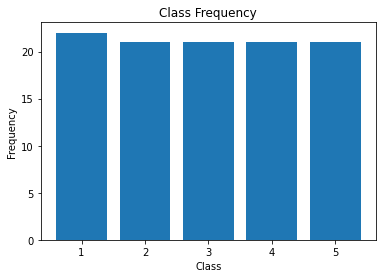

GrossWrittenSales
[1, 2, 4, 3, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


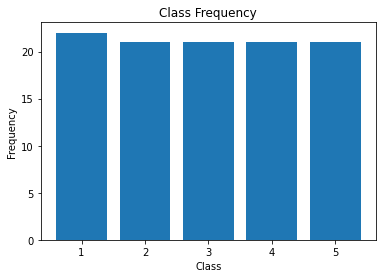

Traffic
[2, 3, 1, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


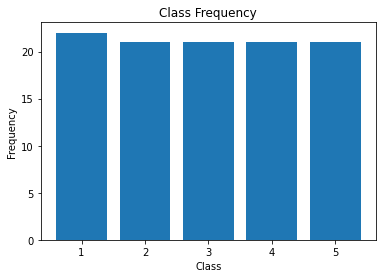

Margin
[1, 2, 4, 3, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


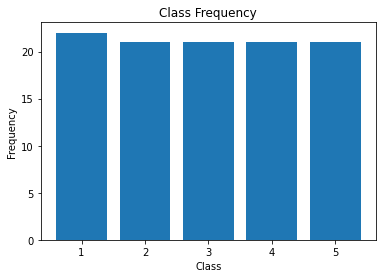

In [7]:
feature = ["WrittenSales","GrossWrittenSales","Traffic","Margin"]

def create_target_class(feature):    
    result = pd.qcut(data[feature], q=[0, 0.2, 0.4, 0.6, 0.80, 1], labels=list(range(1,6)))
#     print(result) 
    
    data[f"{feature}_Range"] = pd.qcut(data[feature], q=[0, 0.2, 0.4, 0.6, 0.80, 1], labels=list(range(1,6)))
    data[f"{feature}_Range"] = pd.Categorical(data[f"{feature}_Range"]) 
    print(data[f"{feature}_Range"].unique())
    
    unique, counts = np.unique(data[f"{feature}_Range"], return_counts=True)
    plt.bar(unique, counts)

    plt.title('Class Frequency')
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    plt.show()


for f in feature:
    print(f)
    create_target_class(f)

In [8]:
data.head()

,Weekly_Date,undefined_funnel,BOFU,MOFU,TOFU,undefined_category,Accessories,Appliance,Bedroom,Dining Room,Finance,Furniture,Living Room,Mattress,Office,Outdoor,WrittenSales,GrossWrittenSales,Traffic,Margin,WrittenSales_Range,GrossWrittenSales_Range,Traffic_Range,Margin_Range
0,2019-12-30,16935.0,18495.0,0.0,3518.0,30315.0,0.0,0.0,6849.0,453.0,0.0,0.0,742.0,368.0,220.0,0.0,2392138.46,2562146.07,13859.0,1063626.90,1,1,2,1
1,2020-01-06,19842.0,14446.0,0.0,4645.0,32552.0,0.0,0.0,4120.0,568.0,0.0,0.0,1072.0,418.0,203.0,0.0,2043289.53,2319326.72,12410.0,983523.10,1,1,2,1
2,2020-01-13,24642.0,53766.0,0.0,4786.0,81296.0,0.0,0.0,387.0,379.0,0.0,0.0,719.0,317.0,97.0,0.0,2273277.34,2751651.73,11158.0,1075415.48,1,1,2,1
3,2020-01-20,23311.0,48472.0,0.0,4661.0,73583.0,0.0,0.0,576.0,531.0,0.0,0.0,1178.0,361.0,214.0,0.0,1972721.88,2439144.33,13581.5,1023192.21,1,1,2,1
4,2020-01-27,35561.0,32694.0,0.0,4624.0,66823.0,48.0,0.0,1522.0,1313.0,0.0,0.0,2063.0,646.0,463.0,0.0,3191924.25,3473314.76,14282.0,1452702.25,2,2,2,2


In [9]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
data.columns[:-8]

Index(['Weekly_Date', 'undefined_funnel', 'BOFU', 'MOFU', 'TOFU',
       'undefined_category', 'Accessories', 'Appliance', 'Bedroom',
       'Dining Room', 'Finance', 'Furniture', 'Living Room', 'Mattress',
       'Office', 'Outdoor'],
      dtype='object')

# Logistic Regression

Before tuning: WrittenSales_Range score: 0.227 
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
[LibLinear]

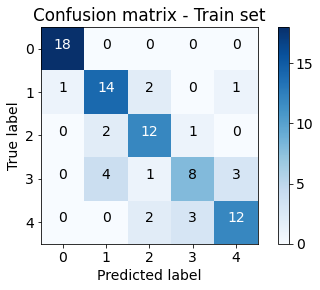

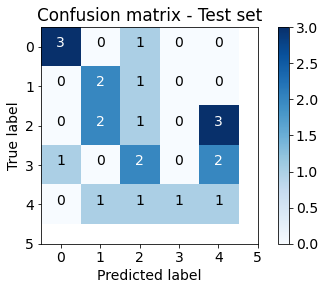

Average Price for Test Data: 3.091
Before tuning: GrossWrittenSales_Range score: 0.227 
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
[LibLinear]

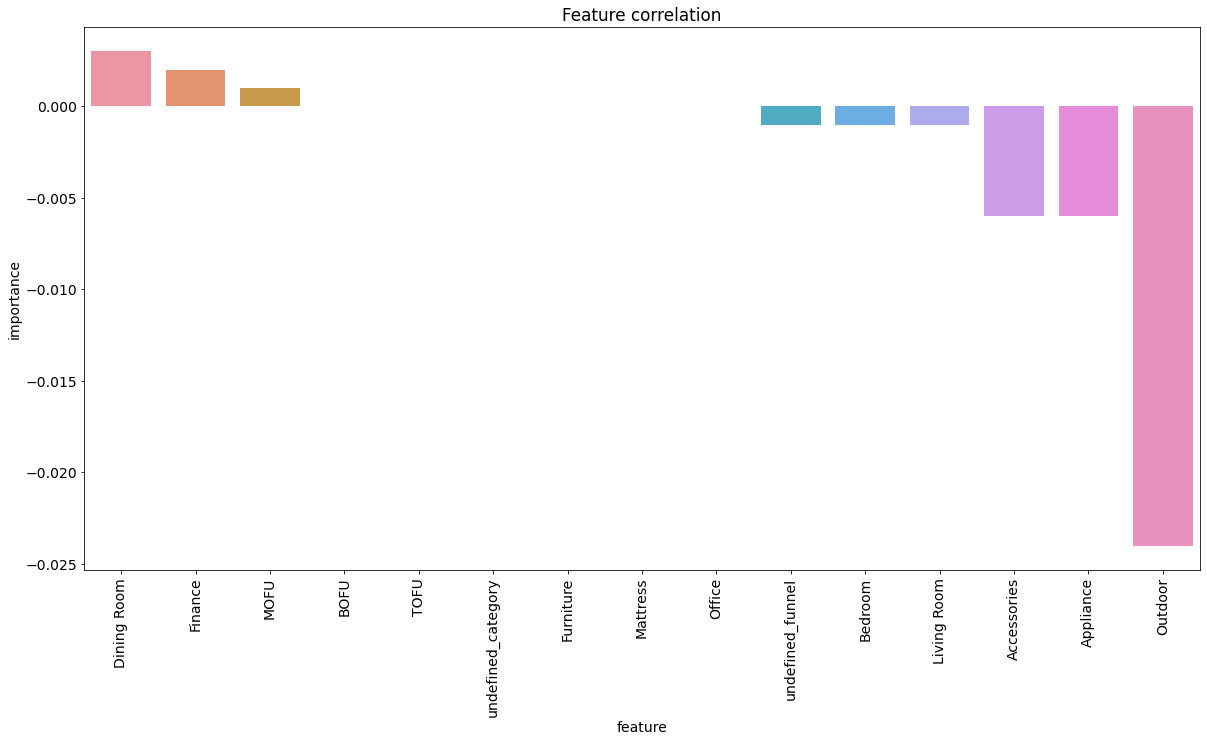

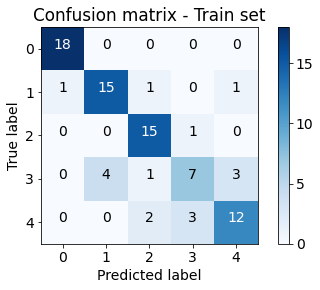

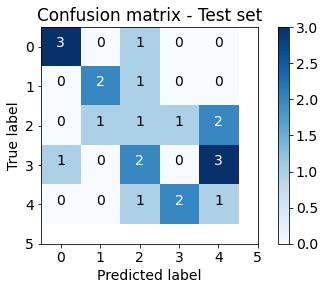

Average Price for Test Data: 3.136
Before tuning: Traffic_Range score: 0.455 
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
[LibLinear]

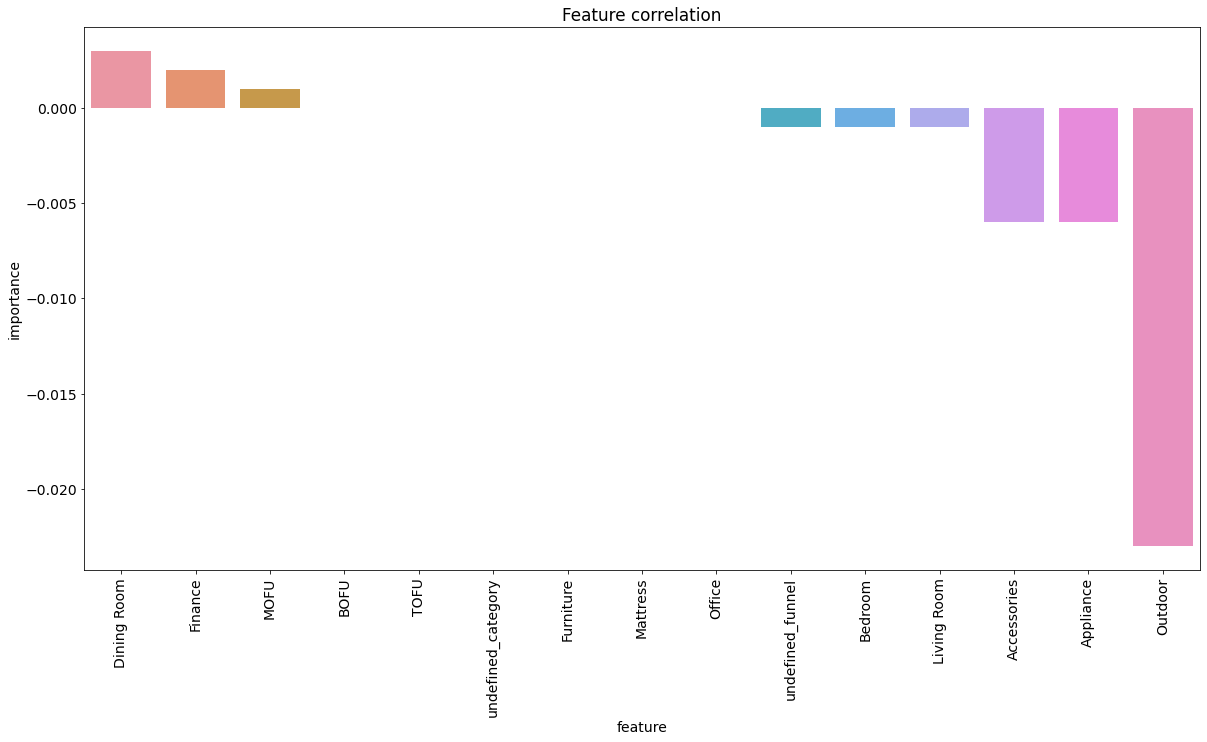

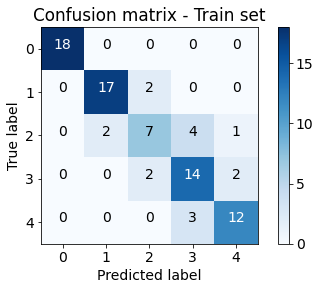

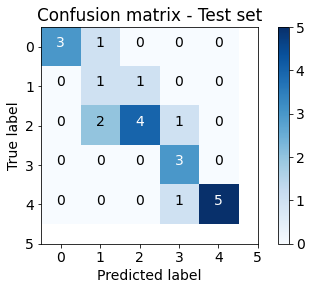

Average Price for Test Data: 3.227
Before tuning: Margin_Range score: 0.182 
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
[LibLinear]

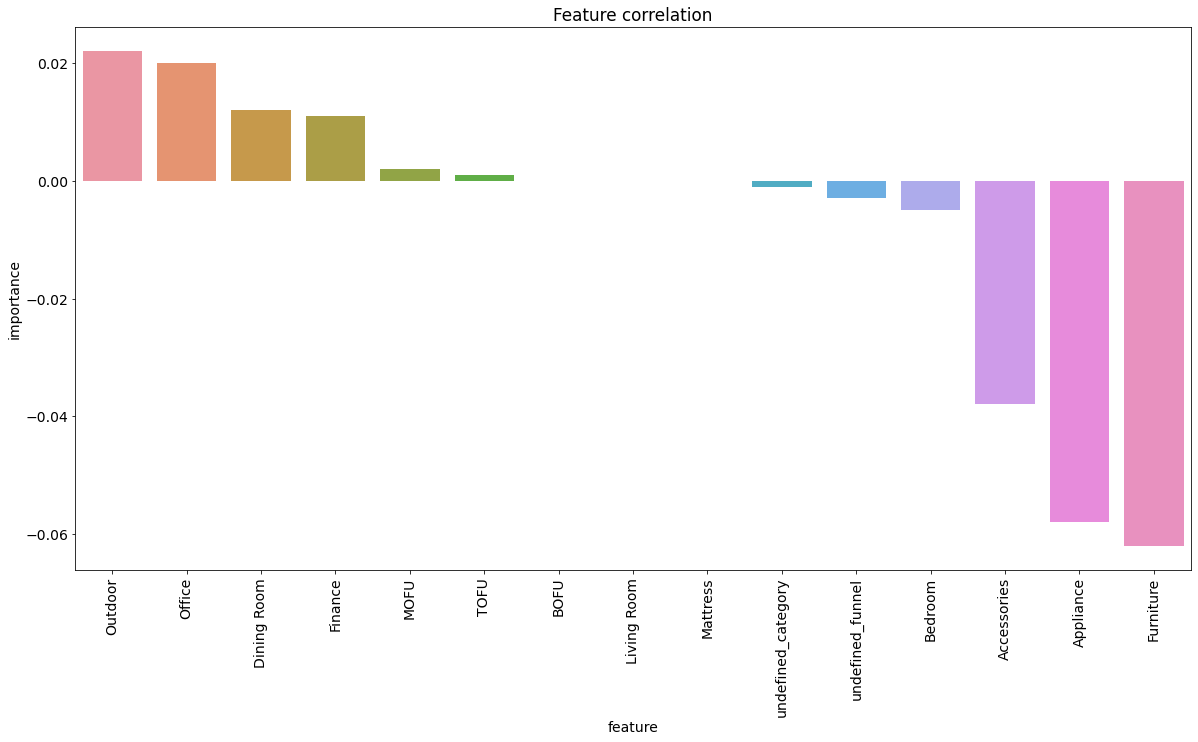

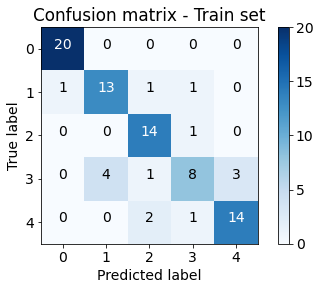

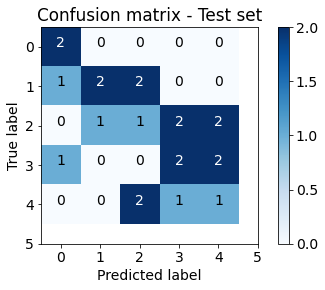

Average Price for Test Data: 3.182


,Model,Features,Target var,precision_tr,recall_tr,f1_score_tr,accuracy_tr,precision_te,recall_te,f1_score_te,accuracy_te,accuracy_te_wo_tun,best_params
0,Logistic Regression Classification,All,WrittenSales_Range,0.762,0.758,0.762,0.756,0.318,0.267,0.318,0.286,0.227,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
1,Logistic Regression Classification,All,GrossWrittenSales_Range,0.798,0.788,0.798,0.789,0.318,0.295,0.318,0.305,0.227,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
2,Logistic Regression Classification,All,Traffic_Range,0.810,0.808,0.810,0.807,0.727,0.814,0.727,0.748,0.455,"{'C': 100, 'penalty': 'l1', 'solver': 'libline..."
3,Logistic Regression Classification,All,Margin_Range,0.821,0.816,0.821,0.813,0.364,0.379,0.364,0.355,0.182,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"


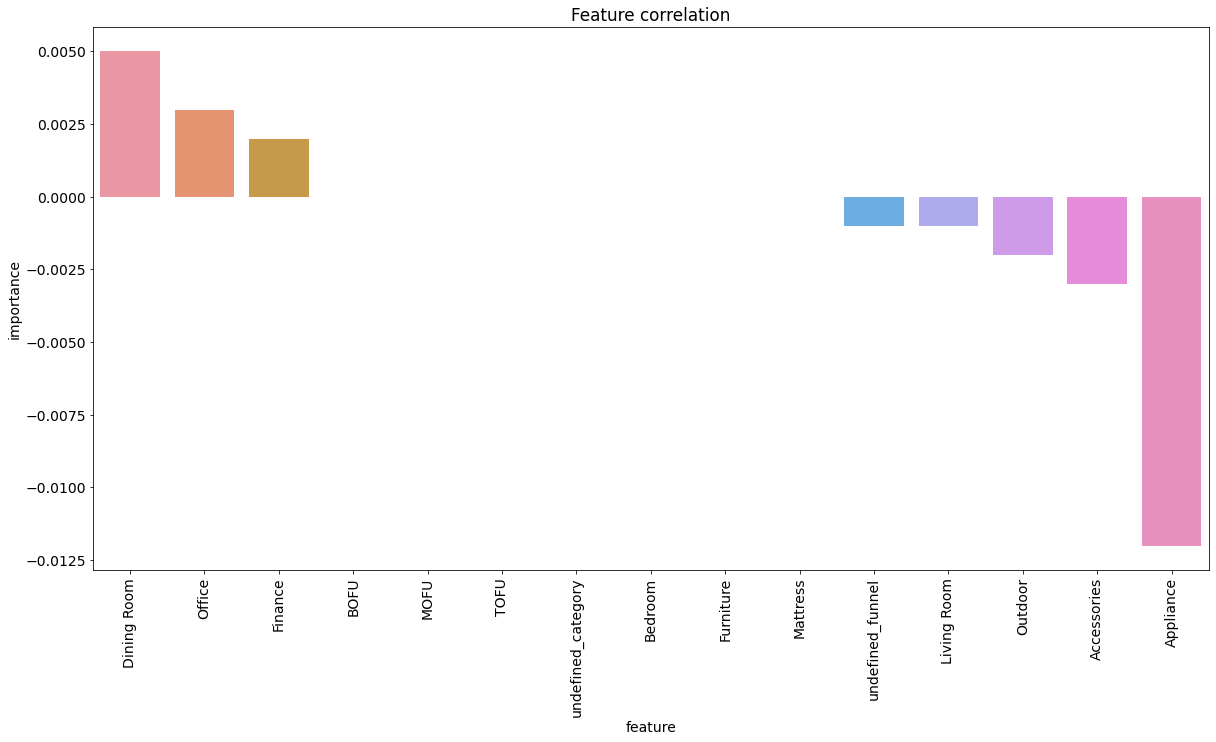

In [ ]:
my_evaluation_LR = pd.DataFrame({'Model': [],
                                 'Features': [],
                                 'Target var':[],
                                 'precision_tr':[],
                                 'recall_tr':[],  
                                 'f1_score_tr':[],
                                 'accuracy_tr':[],
                                 'precision_te':[],
                                 'recall_te':[],  
                                 'f1_score_te':[],
                                 'accuracy_te':[],
                                 'accuracy_te_wo_tun':[],
                                 'best_params' : []
                                })


target = ["WrittenSales_Range","GrossWrittenSales_Range","Traffic_Range","Margin_Range"]
features = data.columns[1:-8]

for t in target:
    X = data[features].values
    y = data[t].astype(int).values
    
    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    from sklearn.model_selection import KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'C': [10**-2,10**-1,10**0,10**1,10**2],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                    "penalty": ['none', 'l1', 'l2', 'elasticnet']
                    }]
    
    ######################## MODEL #######################  
    lr_model1 = LogisticRegression()
    
    lr_model1.fit(X_train,y_train)
    prediction = lr_model1.predict(X_test)
    acc_wo_tuning = '{:.3f}'.format(lr_model1.score(X_test,y_test))
    print("Before tuning: {} score: {} ".format(t,acc_wo_tuning))
    
    # 3.2 call GridSearchCV()`
    model_cv = GridSearchCV(lr_model1, 
                        param_grid = hyper_params,
                        cv=5, verbose=5, n_jobs=3)
            
    # fit the model
    model_cv.fit(X_train, y_train.ravel())
    
    print(model_cv.best_params_)
#     print(model_cv.best_estimator_)

    cv_resulsts = pd.DataFrame(model_cv.cv_results_)
    
#     print("================Grid Search Results===================================")
#     # Get the results
#     print(f"Best Score: {model_cv.best_score_}")
#     print(f"Best Estimator: {model_cv.best_estimator_}")
#     print(f"Best Parameters: {model_cv.best_params_}")
#     print("===================================================")
        
    ################### fit the new model with the optimal number of features ###################
    lr_model2 = LogisticRegression(**model_cv.best_params_, verbose = 5)

    lr_model2.fit(X_train, y_train.ravel()) 

#     print(lr2.get_params().keys())

    # predict of X_train
    y_train_pre = lr_model2.predict(X_train)

    cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
    class_names = [0,1,2,3,4]
    plt.figure()
    plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix - Train set')
    plt.show()
    
    train_report = classification_report(y_train, lr_model2.predict(X_train), output_dict=True)
    train_report_df = pd.DataFrame(train_report).transpose()
#     print(report)
#     print(train_report_df)
#     print("accuracy:" ,train_report_df.iloc[5,2])
#     print("precision:" ,train_report_df.iloc[7,0])
#     print("recall:" ,train_report_df.iloc[7,1])
#     print("f1-score :" ,train_report_df.iloc[7,2])

    # predict of X_test
    y_pre = lr_model2.predict(X_test)

    cnf_matrix = confusion_matrix(y_test, y_pre)
    # Plot non-normalized confusion matrix
    class_names = [0,1,2,3,4,5]
    plt.figure()
    plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix - Test set')
    plt.show()
    
    test_report = classification_report(y_test, lr_model2.predict(X_test), output_dict=True)
    test_report_df = pd.DataFrame(test_report).transpose()
#     print(report)
#     print(test_report_df)
#     print("accuracy:" ,test_report_df.iloc[5,2])
#     print("precision:" ,test_report_df.iloc[7,0])
#     print("recall:" ,test_report_df.iloc[7,1])
#     print("f1-score :" ,test_report_df.iloc[7,2])

    
    # Calculate the feature importance
    importances = pd.DataFrame({'feature':data.columns[1:-8],'importance':np.round(lr_model2.coef_[0],3)})
    importances = importances.sort_values('importance',ascending=False)
#     print(importances)
    
    # Plot the feature importance
    plt.rcParams['font.size'] = 14

    plt.figure(figsize = (20,10))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title('Feature correlation')
    sns_plot = sns.barplot (data = importances, x = "feature", y = 'importance');
    fig = sns_plot.get_figure()


    
    acc_tr = '{:.3f}'.format(train_report_df.iloc[5,2])
    pre_tr = '{:.3f}'.format(train_report_df.iloc[7,0])
    re_tr = '{:.3f}'.format(train_report_df.iloc[7,1])
    f1_tr = '{:.3f}'.format(train_report_df.iloc[7,2])  
    acc_te = '{:.3f}'.format(test_report_df.iloc[5,2])
    pre_te = '{:.3f}'.format(test_report_df.iloc[7,0])
    re_te = '{:.3f}'.format(test_report_df.iloc[7,1])
    f1_te = '{:.3f}'.format(test_report_df.iloc[7,2])


#     print(f"=====================Logistic Regression with all features and {t}:===========================")
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    
    r = my_evaluation_LR.shape[0]
    my_evaluation_LR.loc[r] = ['Logistic Regression Classification', 'All', t, acc_tr,pre_tr,re_tr,f1_tr, acc_te,pre_te,re_te,f1_te,acc_wo_tuning, model_cv.best_params_]


my_evaluation_LR

In [ ]:
my_evaluation_LR

,Model,Features,Target var,precision_tr,recall_tr,f1_score_tr,accuracy_tr,precision_te,recall_te,f1_score_te,accuracy_te,accuracy_te_wo_tun,best_params
0,Logistic Regression Classification,All,WrittenSales_Range,0.762,0.758,0.762,0.756,0.318,0.267,0.318,0.286,0.227,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
1,Logistic Regression Classification,All,GrossWrittenSales_Range,0.798,0.788,0.798,0.789,0.318,0.295,0.318,0.305,0.227,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
2,Logistic Regression Classification,All,Traffic_Range,0.810,0.808,0.810,0.807,0.727,0.814,0.727,0.748,0.455,"{'C': 100, 'penalty': 'l1', 'solver': 'libline..."
3,Logistic Regression Classification,All,Margin_Range,0.821,0.816,0.821,0.813,0.364,0.379,0.364,0.355,0.182,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"


In [ ]:
my_evaluation_LR.to_csv(f"{result_path}Marketing_Spend_All_Log_Reg_results.csv")

# KNN Classification

Before tuning: WrittenSales_Range score: 0.364 
Best Parameters: {'leaf_size': 1, 'n_neighbors': 32, 'p': 1}


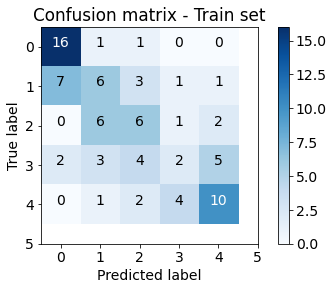

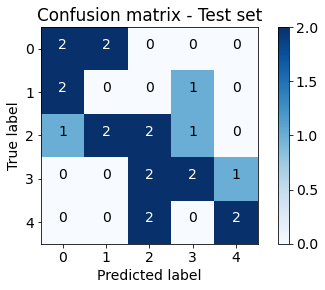

Average Price for Test Data: 3.091
Before tuning: Traffic_Range score: 0.409 
Best Parameters: {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


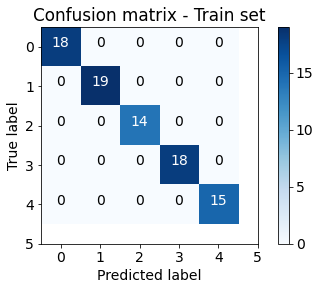

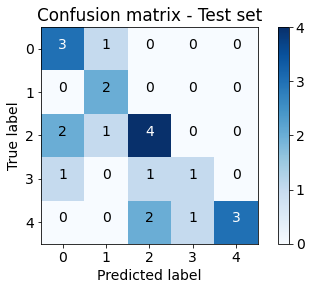

Average Price for Test Data: 3.227
Before tuning: Margin_Range score: 0.364 
Best Parameters: {'leaf_size': 1, 'n_neighbors': 26, 'p': 1}


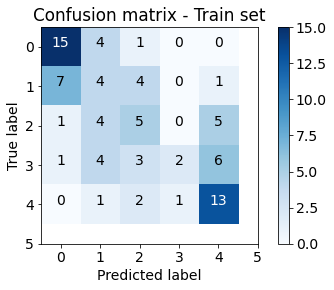

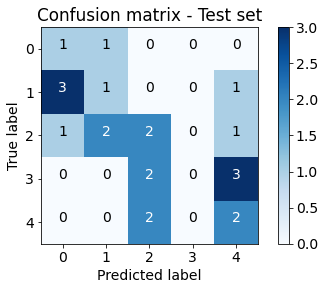

Average Price for Test Data: 3.182
Before tuning: GrossWrittenSales_Range score: 0.364 
Best Parameters: {'leaf_size': 1, 'n_neighbors': 25, 'p': 1}


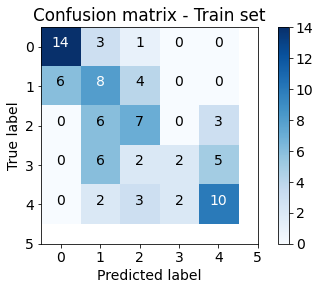

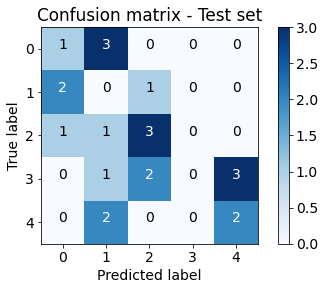

Average Price for Test Data: 3.136


,Model,Features,Target var,precision_tr,recall_tr,f1_score_tr,accuracy_tr,precision_te,recall_te,f1_score_te,accuracy_te,accuracy_te_wo_tun,best_params
0,KNN Classification,All,WrittenSales_Range,0.476,0.440,0.476,0.449,0.364,0.398,0.364,0.377,0.364,"{'leaf_size': 1, 'n_neighbors': 32, 'p': 1}"
1,KNN Classification,All,Traffic_Range,1.000,1.000,1.000,1.000,0.591,0.659,0.591,0.588,0.409,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}"
2,KNN Classification,All,Margin_Range,0.464,0.485,0.464,0.433,0.273,0.218,0.273,0.234,0.364,"{'leaf_size': 1, 'n_neighbors': 26, 'p': 1}"
3,KNN Classification,All,GrossWrittenSales_Range,0.488,0.499,0.488,0.472,0.273,0.232,0.273,0.250,0.364,"{'leaf_size': 1, 'n_neighbors': 25, 'p': 1}"


In [ ]:
my_evaluation_KNN = pd.DataFrame({'Model': [],
                                 'Features': [],
                                 'Target var':[],
                                 'precision_tr':[],
                                 'recall_tr':[],  
                                 'f1_score_tr':[],
                                 'accuracy_tr':[],
                                 'precision_te':[],
                                 'recall_te':[],  
                                 'f1_score_te':[],
                                 'accuracy_te':[],
                                 'accuracy_te_wo_tun':[],
                                 'best_params' : []
                                })


target = ["WrittenSales_Range", "Traffic_Range", "Margin_Range", "GrossWrittenSales_Range"]
features = data.columns[1:-8]

for t in target:
    X = data[features].values
    y = data[t].astype(int).values
    
    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    from sklearn.model_selection import KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{"leaf_size":list(range(1,50)),
                     "n_neighbors":list(range(1,300)),
                     "p":[1,2]
                    }]
    
    
    ######################## MODEL #######################  
    knn1 = KNeighborsClassifier()
    
    knn1.fit(X_train,y_train)
    prediction = knn1.predict(X_test)
    acc_wo_tuning = '{:.3f}'.format(knn1.score(X_test,y_test))
    print("Before tuning: {} score: {} ".format(t,acc_wo_tuning))

    # 3.2 call GridSearchCV()`
    model_cv = GridSearchCV(knn1, 
                   param_grid = hyper_params,
                   cv=5)
            
    # fit the model
    model_cv.fit(X_train, y_train.ravel())
    
#     print(model_cv.best_params_)
#     print(model_cv.best_estimator_)

    cv_resulsts = pd.DataFrame(model_cv.cv_results_)
    
#     print("================Grid Search Results===================================")
#     # Get the results
#     print(f"Best Score: {model_cv.best_score_}")
#     print(f"Best Estimator: {model_cv.best_estimator_}")
    print(f"Best Parameters: {model_cv.best_params_}")
#     print("===================================================")
        
    ################### fit the new model with the optimal number of features ###################
    knn2 = KNeighborsClassifier(**model_cv.best_params_)

    knn2.fit(X_train, y_train.ravel())

#     print(knn2.get_params().keys())

    # predict of X_train
    y_train_pre = knn2.predict(X_train)

    cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
    class_names = [0,1,2,3,4,5]
    plt.figure()
    plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix - Train set')
    plt.show()
    
    train_report = classification_report(y_train, knn2.predict(X_train), output_dict=True)
    train_report_df = pd.DataFrame(train_report).transpose()
#     print(report)
#     print(train_report_df)
#     print("accuracy:" ,train_report_df.iloc[5,2])
#     print("precision:" ,train_report_df.iloc[7,0])
#     print("recall:" ,train_report_df.iloc[7,1])
#     print("f1-score :" ,train_report_df.iloc[7,2])

    # predict of X_test
    y_pre = knn2.predict(X_test)

    cnf_matrix = confusion_matrix(y_test, y_pre)
    # Plot non-normalized confusion matrix
    class_names = [0,1,2,3,4]
    plt.figure()
    plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix - Test set')
    plt.show()
    
    test_report = classification_report(y_test, knn2.predict(X_test), output_dict=True)
    test_report_df = pd.DataFrame(test_report).transpose()
#     print(report)
#     print(test_report_df)
#     print("accuracy:" ,test_report_df.iloc[5,2])
#     print("precision:" ,test_report_df.iloc[7,0])
#     print("recall:" ,test_report_df.iloc[7,1])
#     print("f1-score :" ,test_report_df.iloc[7,2])
    
    acc_tr = '{:.3f}'.format(train_report_df.iloc[5,2])
    pre_tr = '{:.3f}'.format(train_report_df.iloc[7,0])
    re_tr = '{:.3f}'.format(train_report_df.iloc[7,1])
    f1_tr = '{:.3f}'.format(train_report_df.iloc[7,2])  
    acc_te = '{:.3f}'.format(test_report_df.iloc[5,2])
    pre_te = '{:.3f}'.format(test_report_df.iloc[7,0])
    re_te = '{:.3f}'.format(test_report_df.iloc[7,1])
    f1_te = '{:.3f}'.format(test_report_df.iloc[7,2])


#     print(f"=====================KNN with all features and {t}:===========================")
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    
    r = my_evaluation_KNN.shape[0]
    my_evaluation_KNN.loc[r] = ['KNN Classification', 'All', t, acc_tr,pre_tr,re_tr,f1_tr, acc_te,pre_te,re_te,f1_te,acc_wo_tuning, model_cv.best_params_]


my_evaluation_KNN

In [ ]:
my_evaluation_KNN

,Model,Features,Target var,precision_tr,recall_tr,f1_score_tr,accuracy_tr,precision_te,recall_te,f1_score_te,accuracy_te,accuracy_te_wo_tun,best_params
0,KNN Classification,All,WrittenSales_Range,0.476,0.440,0.476,0.449,0.364,0.398,0.364,0.377,0.364,"{'leaf_size': 1, 'n_neighbors': 32, 'p': 1}"
1,KNN Classification,All,Traffic_Range,1.000,1.000,1.000,1.000,0.591,0.659,0.591,0.588,0.409,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}"
2,KNN Classification,All,Margin_Range,0.464,0.485,0.464,0.433,0.273,0.218,0.273,0.234,0.364,"{'leaf_size': 1, 'n_neighbors': 26, 'p': 1}"
3,KNN Classification,All,GrossWrittenSales_Range,0.488,0.499,0.488,0.472,0.273,0.232,0.273,0.250,0.364,"{'leaf_size': 1, 'n_neighbors': 25, 'p': 1}"


In [ ]:
my_evaluation_KNN.to_csv(f"{result_path}Marketing_Spend_All_KNNC_results.csv")

# Decision Tree Classification

Before tuning: WrittenSales_Range score: 0.364 
Fitting 5 folds for each of 84 candidates, totalling 420 fits


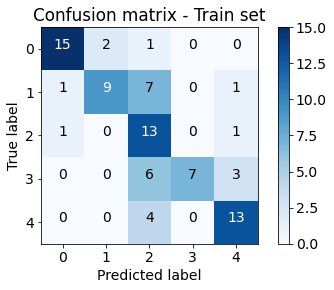

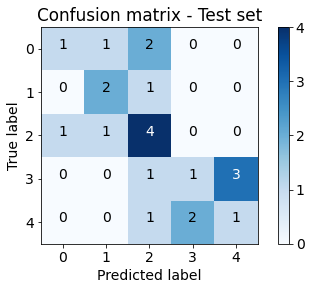

Average Price for Test Data: 3.091
Before tuning: Traffic_Range score: 0.591 
Fitting 5 folds for each of 84 candidates, totalling 420 fits


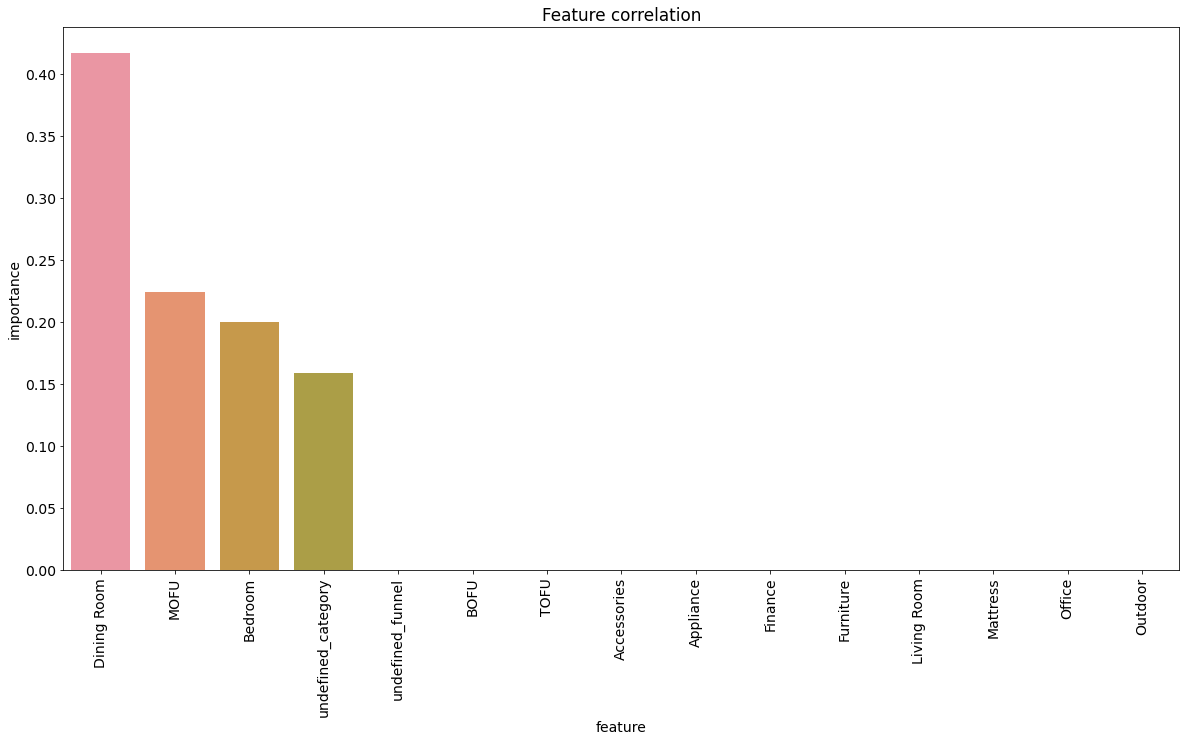

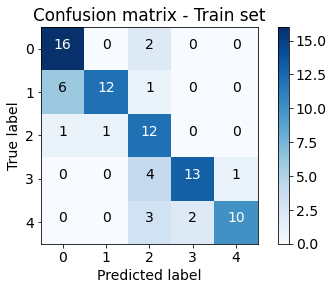

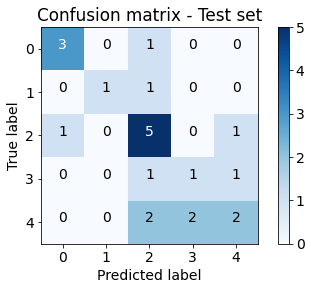

Average Price for Test Data: 3.227
Before tuning: Margin_Range score: 0.318 
Fitting 5 folds for each of 84 candidates, totalling 420 fits


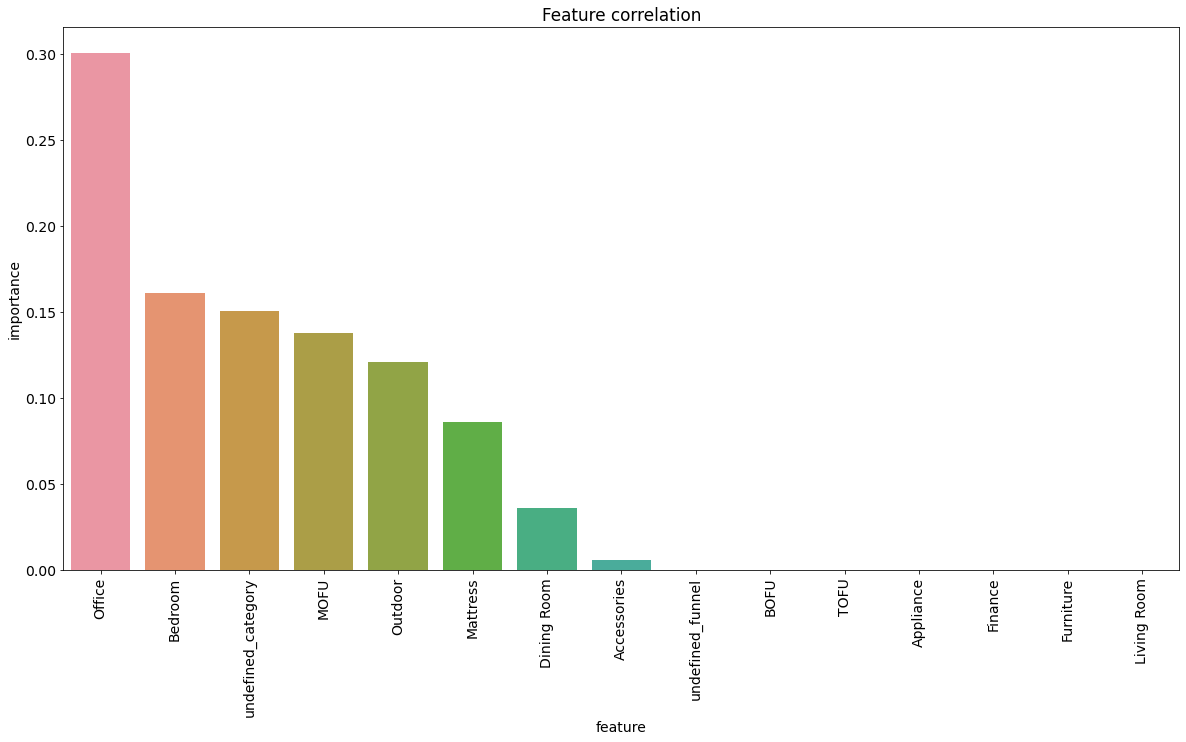

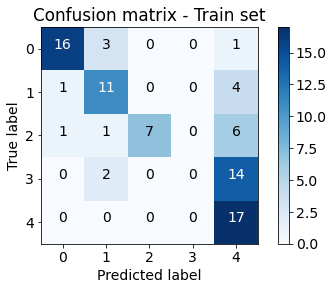

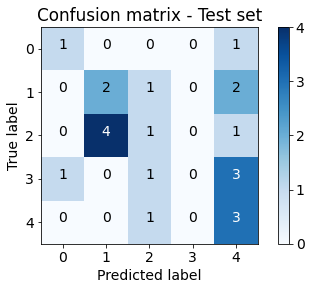

Average Price for Test Data: 3.182
Before tuning: GrossWrittenSales_Range score: 0.455 
Fitting 5 folds for each of 84 candidates, totalling 420 fits


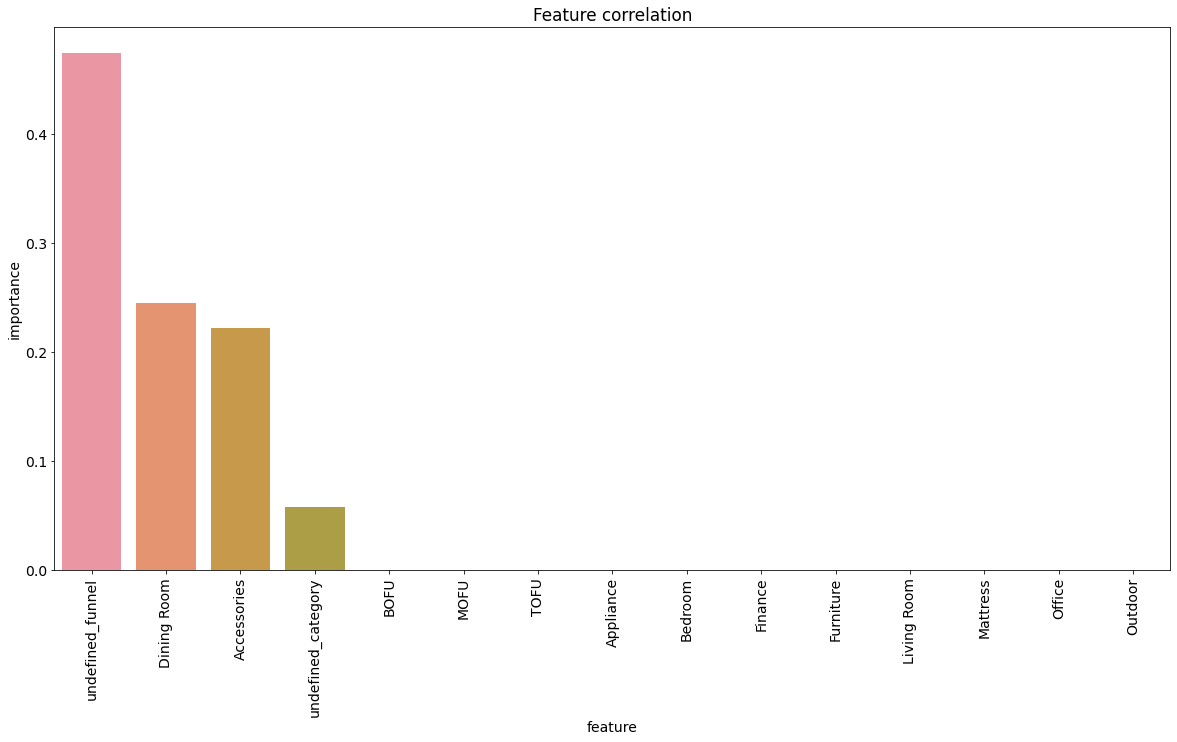

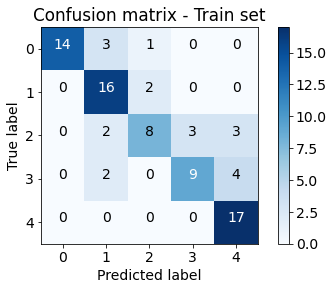

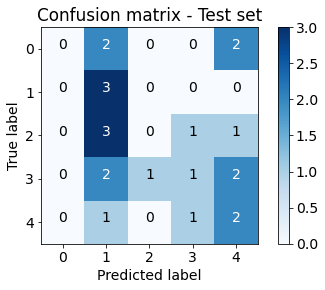

Average Price for Test Data: 3.136


,Model,Features,Target var,precision_tr,recall_tr,f1_score_tr,accuracy_tr,precision_te,recall_te,f1_score_te,accuracy_te,accuracy_te_wo_tun,best_params
0,Decision Tree Classification,All,WrittenSales_Range,0.679,0.776,0.679,0.684,0.409,0.402,0.409,0.386,0.364,"{'criterion': 'gini', 'max_depth': 3, 'min_sam..."
1,Decision Tree Classification,All,Traffic_Range,0.750,0.797,0.750,0.754,0.545,0.568,0.545,0.539,0.591,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
2,Decision Tree Classification,All,Margin_Range,0.607,0.595,0.607,0.558,0.318,0.244,0.318,0.261,0.318,"{'criterion': 'gini', 'max_depth': 3, 'min_sam..."
3,Decision Tree Classification,All,GrossWrittenSales_Range,0.762,0.779,0.762,0.754,0.273,0.180,0.273,0.185,0.455,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."


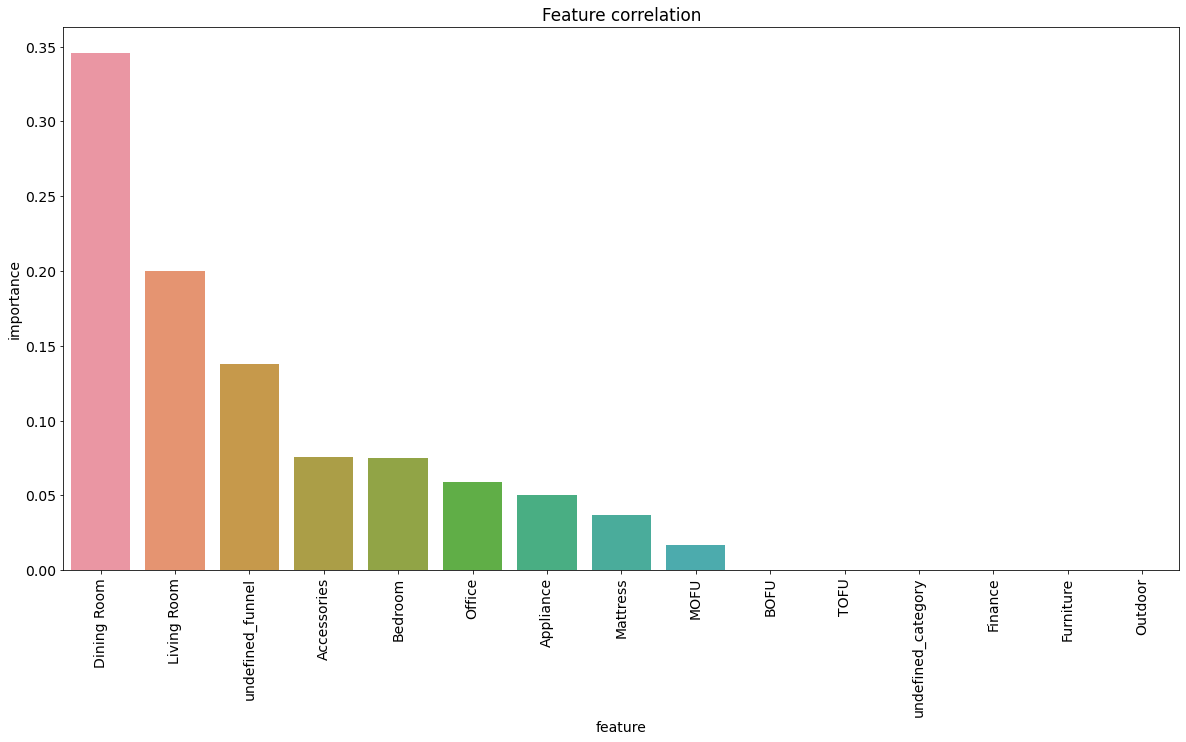

In [ ]:
my_evaluation_DT = pd.DataFrame({'Model': [],
                                 'Features': [],
                                 'Target var':[],
                                 'precision_tr':[],
                                 'recall_tr':[],  
                                 'f1_score_tr':[],
                                 'accuracy_tr':[],
                                 'precision_te':[],
                                 'recall_te':[],  
                                 'f1_score_te':[],
                                 'accuracy_te':[],
                                 'accuracy_te_wo_tun':[],
                                 'best_params' : []
                                })


target = ["WrittenSales_Range", "Traffic_Range", "Margin_Range", "GrossWrittenSales_Range"]
features = data.columns[1:-8]

for t in target:
    X = data[features].values
    y = data[t].astype(int).values
    
    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    from sklearn.model_selection import KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{
        'max_depth': [2, 3, 5, 10, 20,100, 200],
        'min_samples_leaf': [5, 10, 20, 50, 100, 200],
        'criterion': ["gini", "entropy"]}]
    
     ######################## MODEL #######################  
    dec_tree1 = DecisionTreeClassifier(random_state=42)
    
    dec_tree1.fit(X_train,y_train)
    prediction = dec_tree1.predict(X_test)
    acc_wo_tuning = '{:.3f}'.format(dec_tree1.score(X_test,y_test))
    print("Before tuning: {} score: {} ".format(t,acc_wo_tuning))
    
    # 3.2 call GridSearchCV()`
    model_cv = GridSearchCV(dec_tree1, 
                        param_grid = hyper_params,
                        cv=5, verbose=5, n_jobs=3)
            
    # fit the model
    model_cv.fit(X_train, y_train.ravel())
    
#     print(model_cv.best_params_)
#     print(model_cv.best_estimator_)

    cv_resulsts = pd.DataFrame(model_cv.cv_results_)
    
#     print("================Grid Search Results===================================")
#     # Get the results
#     print(f"Best Score: {model_cv.best_score_}")
#     print(f"Best Estimator: {model_cv.best_estimator_}")
#     print(f"Best Parameters: {model_cv.best_params_}")
#     print("===================================================")
        
    ################### fit the new model with the optimal number of features ###################
    dec_tree2 = DecisionTreeClassifier(**model_cv.best_params_)   
    dec_tree2.fit(X_train, y_train)

#     print(rand_for2.get_params().keys())

    # predict of X_train
    y_train_pre = dec_tree2.predict(X_train)

    cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
    class_names = [0,1,2,3,4]
    plt.figure()
    plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix - Train set')
    plt.show()
    
    train_report = classification_report(y_train, dec_tree2.predict(X_train), output_dict=True)
    train_report_df = pd.DataFrame(train_report).transpose()
#     print(report)
#     print(train_report_df)
#     print("accuracy:" ,train_report_df.iloc[5,2])
#     print("precision:" ,train_report_df.iloc[7,0])
#     print("recall:" ,train_report_df.iloc[7,1])
#     print("f1-score :" ,train_report_df.iloc[7,2])

    # predict of X_test
    y_pre = dec_tree2.predict(X_test)

    cnf_matrix = confusion_matrix(y_test, y_pre)
    # Plot non-normalized confusion matrix
    class_names = [0,1,2,3,4]
    plt.figure()
    plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix - Test set')
    plt.show()
    
    test_report = classification_report(y_test, dec_tree2.predict(X_test), output_dict=True)
    test_report_df = pd.DataFrame(test_report).transpose()
#     print(report)
#     print(test_report_df)
#     print("accuracy:" ,test_report_df.iloc[5,2])
#     print("precision:" ,test_report_df.iloc[7,0])
#     print("recall:" ,test_report_df.iloc[7,1])
#     print("f1-score :" ,test_report_df.iloc[7,2])

    
    # Calculate the feature importance
    importances = pd.DataFrame({'feature':data.columns[1:-8],'importance':np.round(dec_tree2.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False)
#     print(importances)
    
    # Plot the feature importance
    plt.rcParams['font.size'] = 14

    plt.figure(figsize = (20,10))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title('Feature correlation')
    sns_plot = sns.barplot (data = importances, x = "feature", y = 'importance');
    fig = sns_plot.get_figure()


    
    acc_tr = '{:.3f}'.format(train_report_df.iloc[5,2])
    pre_tr = '{:.3f}'.format(train_report_df.iloc[7,0])
    re_tr = '{:.3f}'.format(train_report_df.iloc[7,1])
    f1_tr = '{:.3f}'.format(train_report_df.iloc[7,2])  
    acc_te = '{:.3f}'.format(test_report_df.iloc[5,2])
    pre_te = '{:.3f}'.format(test_report_df.iloc[7,0])
    re_te = '{:.3f}'.format(test_report_df.iloc[7,1])
    f1_te = '{:.3f}'.format(test_report_df.iloc[7,2])


#     print(f"=====================Decision Tree with all features and {t}:===========================")
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    
    r = my_evaluation_DT.shape[0]
    my_evaluation_DT.loc[r] = ['Decision Tree Classification', 'All', t, acc_tr,pre_tr,re_tr,f1_tr, acc_te,pre_te,re_te,f1_te,acc_wo_tuning, model_cv.best_params_]



my_evaluation_DT

In [ ]:
my_evaluation_DT.to_csv(f"{result_path}\\Marketing_Spend_All_DT_Classification_results.csv")

In [ ]:
my_evaluation_DT

,Model,Features,Target var,precision_tr,recall_tr,f1_score_tr,accuracy_tr,precision_te,recall_te,f1_score_te,accuracy_te,accuracy_te_wo_tun,best_params
0,Decision Tree Classification,All,WrittenSales_Range,0.679,0.776,0.679,0.684,0.409,0.402,0.409,0.386,0.364,"{'criterion': 'gini', 'max_depth': 3, 'min_sam..."
1,Decision Tree Classification,All,Traffic_Range,0.750,0.797,0.750,0.754,0.545,0.568,0.545,0.539,0.591,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
2,Decision Tree Classification,All,Margin_Range,0.607,0.595,0.607,0.558,0.318,0.244,0.318,0.261,0.318,"{'criterion': 'gini', 'max_depth': 3, 'min_sam..."
3,Decision Tree Classification,All,GrossWrittenSales_Range,0.762,0.779,0.762,0.754,0.273,0.180,0.273,0.185,0.455,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."


# Random Forest Classification

Before tuning: WrittenSales_Range score: 0.36363636363636365 
Fitting 5 folds for each of 1792 candidates, totalling 8960 fits


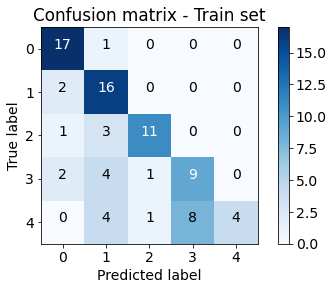

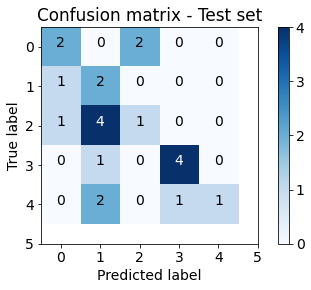

Average Price for Test Data: 3.091
Before tuning: Traffic_Range score: 0.5909090909090909 
Fitting 5 folds for each of 1792 candidates, totalling 8960 fits


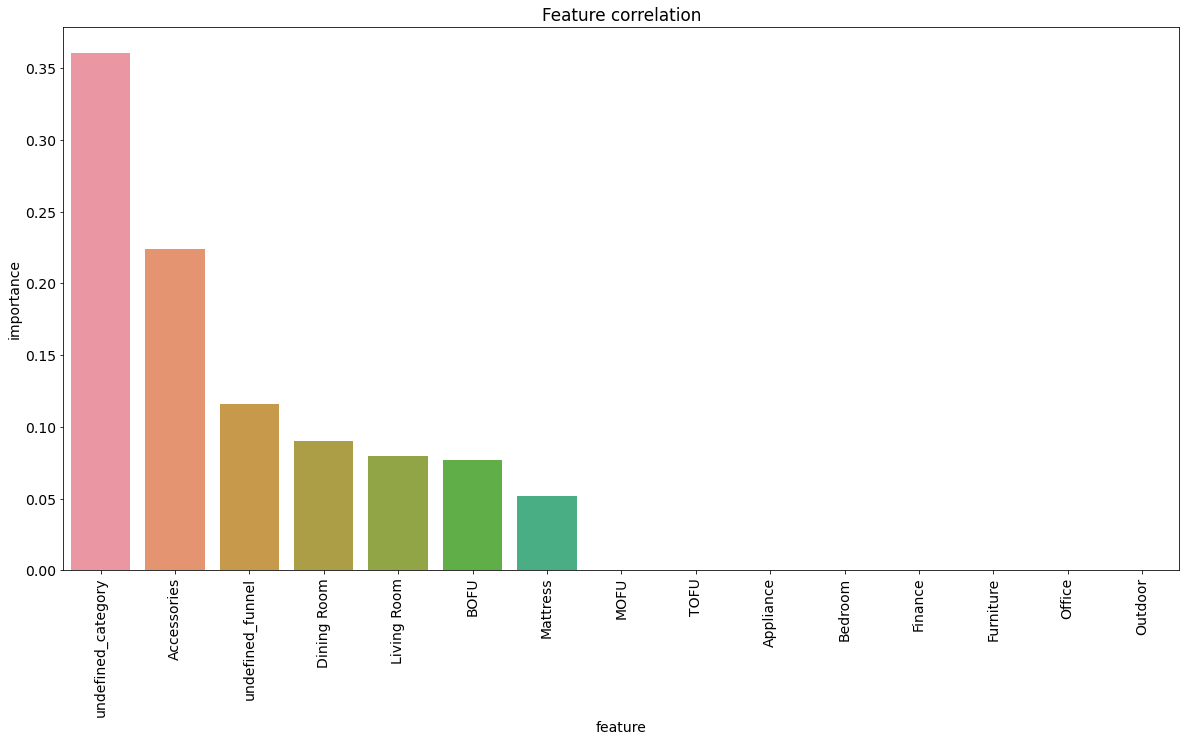

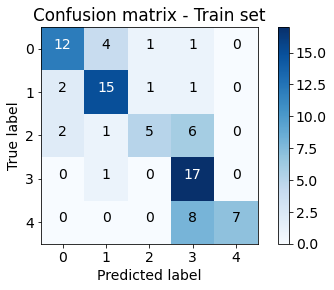

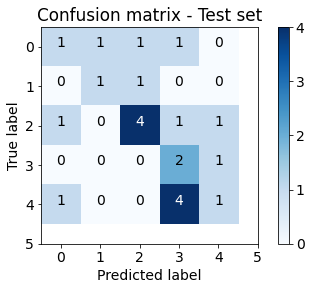

Average Price for Test Data: 3.227
Before tuning: Margin_Range score: 0.4090909090909091 
Fitting 5 folds for each of 1792 candidates, totalling 8960 fits


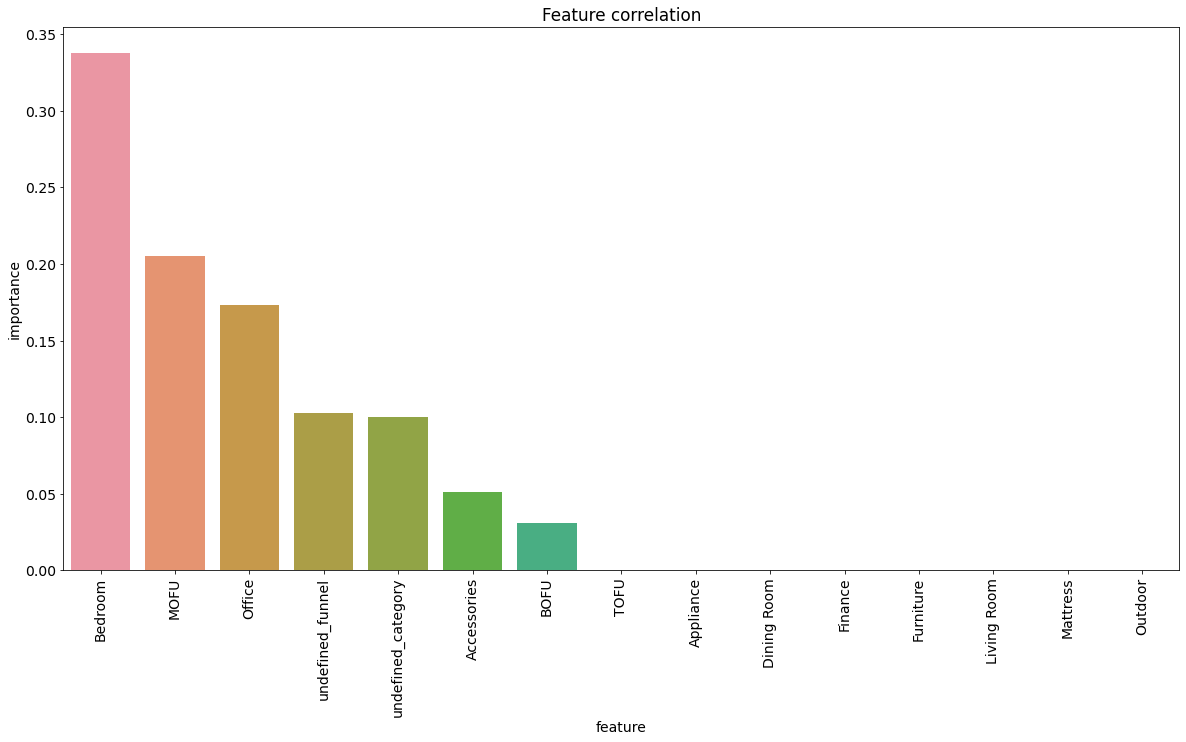

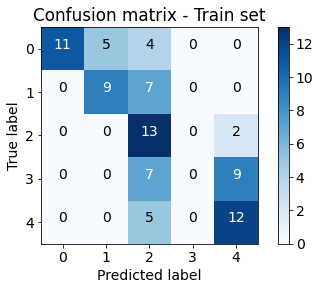

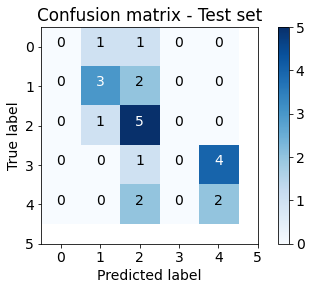

Average Price for Test Data: 3.182
Before tuning: GrossWrittenSales_Range score: 0.36363636363636365 
Fitting 5 folds for each of 1792 candidates, totalling 8960 fits


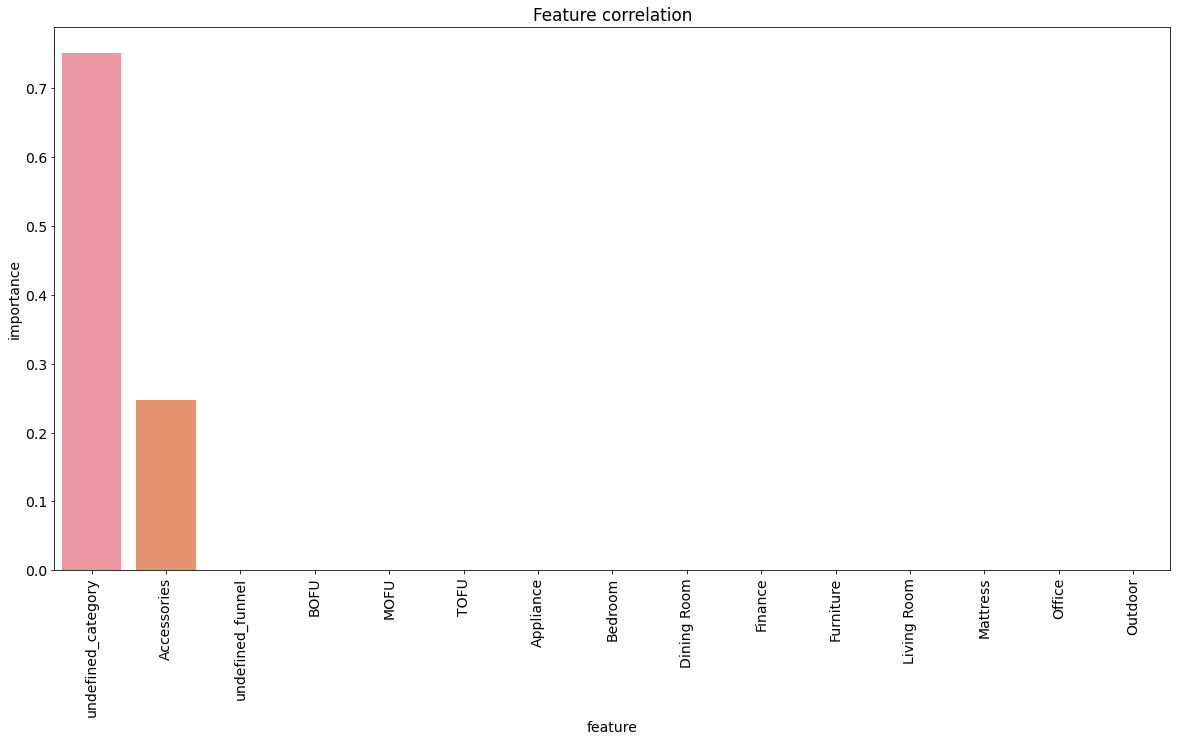

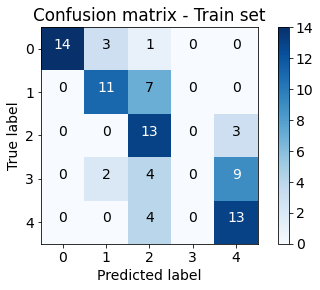

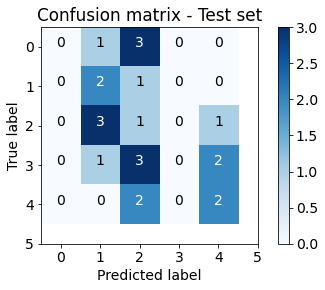

Average Price for Test Data: 3.136


,Model,Features,Target var,precision_tr,recall_tr,f1_score_tr,accuracy_tr,precision_te,recall_te,f1_score_te,accuracy_te,accuracy_te_wo_tun,best_params
0,Random Forest Classification,All,WrittenSales_Range,0.679,0.742,0.679,0.653,0.455,0.576,0.455,0.452,0.455,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
1,Random Forest Classification,All,Traffic_Range,0.667,0.730,0.667,0.657,0.409,0.443,0.409,0.403,0.455,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
2,Random Forest Classification,All,Margin_Range,0.536,0.531,0.536,0.496,0.455,0.321,0.455,0.370,0.455,"{'criterion': 'entropy', 'max_depth': 2, 'max_..."
3,Random Forest Classification,All,GrossWrittenSales_Range,0.607,0.552,0.607,0.561,0.227,0.134,0.227,0.166,0.455,"{'criterion': 'entropy', 'max_depth': 2, 'max_..."


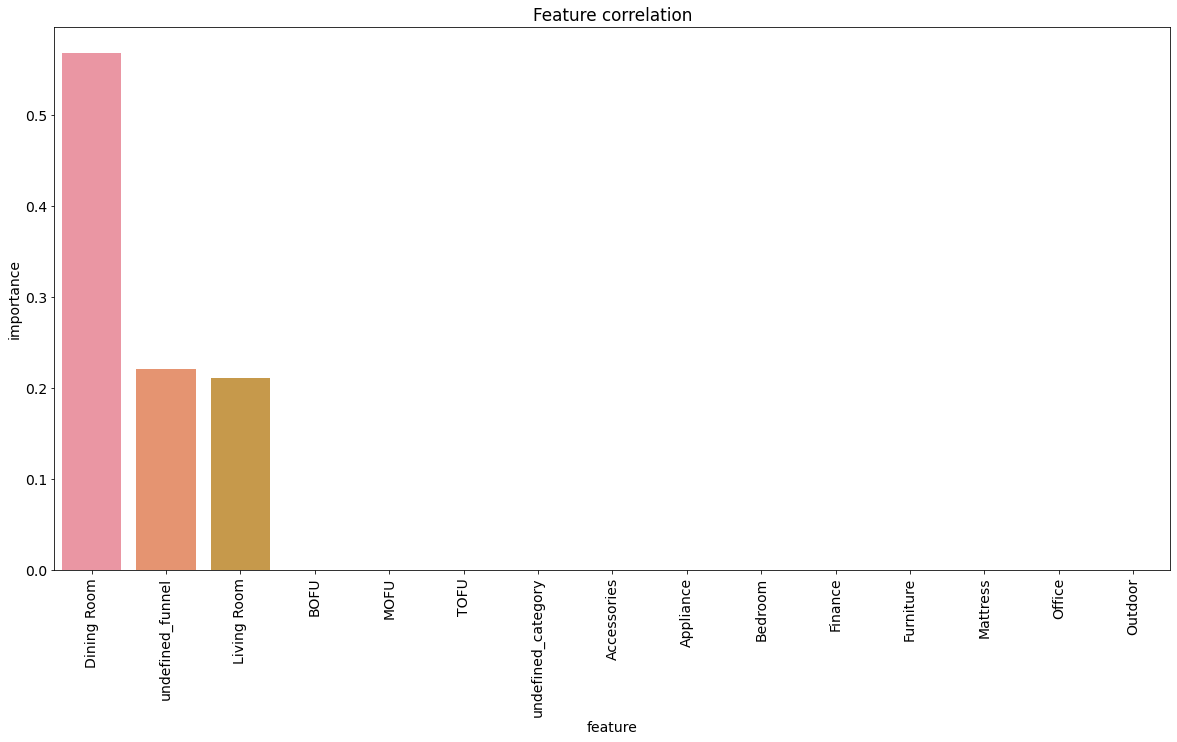

In [ ]:
my_evaluation_RF = pd.DataFrame({'Model': [],
                                 'Features': [],
                                 'Target var':[],
                                 'precision_tr':[],
                                 'recall_tr':[],  
                                 'f1_score_tr':[],
                                 'accuracy_tr':[],
                                 'precision_te':[],
                                 'recall_te':[],  
                                 'f1_score_te':[],
                                 'accuracy_te':[],
                                 'accuracy_te_wo_tun':[],
                                 'best_params' : []
                                })


target = ["WrittenSales_Range", "Traffic_Range", "Margin_Range", "GrossWrittenSales_Range"]
features = data.columns[1:-8]

for t in target:
    X = data[features].values
    y = data[t].astype(int).values
    
    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    from sklearn.model_selection import KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{
        "criterion":['gini','entropy'],
        "max_depth":range(1,5),
        "min_samples_split":range(1,5),
        "min_samples_leaf":range(1,5), 
        "max_features": range(1,len(features)) # n_features_selected
    }]
    
     ######################## MODEL #######################  
    rand_for1 = RandomForestClassifier(n_estimators = 100,random_state = 1)
    
    rand_for1.fit(X_train,y_train)
    prediction = rand_for1.predict(X_test)
    r2_wo_tuning = rand_for1.score(X_test,y_test)
    print("Before tuning: {} score: {} ".format(t,r2_wo_tuning))
    
    # 3.2 call GridSearchCV()`
    model_cv = GridSearchCV(rand_for1, 
                        param_grid = hyper_params,
                        cv=5, verbose=5, n_jobs=3)
            
    # fit the model
    model_cv.fit(X_train, y_train.ravel())
    
#     print(model_cv.best_params_)
#     print(model_cv.best_estimator_)

    cv_resulsts = pd.DataFrame(model_cv.cv_results_)
    
#     print("================Grid Search Results===================================")
#     # Get the results
#     print(f"Best Score: {model_cv.best_score_}")
#     print(f"Best Estimator: {model_cv.best_estimator_}")
#     print(f"Best Parameters: {model_cv.best_params_}")
#     print("===================================================")
        
    ################### fit the new model with the optimal number of features ###################
    rand_for2 = DecisionTreeClassifier(**model_cv.best_params_)   
    rand_for2.fit(X_train, y_train)

#     print(rand_for2.get_params().keys())

    # predict of X_train
    y_train_pre = rand_for2.predict(X_train)

    cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
    class_names = [0,1,2,3,4]
    plt.figure()
    plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix - Train set')
    plt.show()
    
    train_report = classification_report(y_train, rand_for2.predict(X_train), output_dict=True)
    train_report_df = pd.DataFrame(train_report).transpose()
#     print(report)
#     print(train_report_df)
#     print("accuracy:" ,train_report_df.iloc[5,2])
#     print("precision:" ,train_report_df.iloc[7,0])
#     print("recall:" ,train_report_df.iloc[7,1])
#     print("f1-score :" ,train_report_df.iloc[7,2])

    # predict of X_test
    y_pre = rand_for2.predict(X_test)

    cnf_matrix = confusion_matrix(y_test, y_pre)
    # Plot non-normalized confusion matrix
    class_names = [0,1,2,3,4,5]
    plt.figure()
    plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix - Test set')
    plt.show()
    
    test_report = classification_report(y_test, rand_for2.predict(X_test), output_dict=True)
    test_report_df = pd.DataFrame(test_report).transpose()
#     print(report)
#     print(test_report_df)
#     print("accuracy:" ,test_report_df.iloc[5,2])
#     print("precision:" ,test_report_df.iloc[7,0])
#     print("recall:" ,test_report_df.iloc[7,1])
#     print("f1-score :" ,test_report_df.iloc[7,2])

    
    # Calculate the feature importance
    importances = pd.DataFrame({'feature':data.columns[1:-8],'importance':np.round(rand_for2.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False)
#     print(importances)
    
    # Plot the feature importance
    plt.rcParams['font.size'] = 14

    plt.figure(figsize = (20,10))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title('Feature correlation')
    sns_plot = sns.barplot (data = importances, x = "feature", y = 'importance');
    fig = sns_plot.get_figure()


    
    acc_tr = '{:.3f}'.format(train_report_df.iloc[5,2])
    pre_tr = '{:.3f}'.format(train_report_df.iloc[7,0])
    re_tr = '{:.3f}'.format(train_report_df.iloc[7,1])
    f1_tr = '{:.3f}'.format(train_report_df.iloc[7,2])  
    acc_te = '{:.3f}'.format(test_report_df.iloc[5,2])
    pre_te = '{:.3f}'.format(test_report_df.iloc[7,0])
    re_te = '{:.3f}'.format(test_report_df.iloc[7,1])
    f1_te = '{:.3f}'.format(test_report_df.iloc[7,2])


#     print(f"=====================Random Forest with all features and {t}:===========================")
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    
    r = my_evaluation_RF.shape[0]
    my_evaluation_RF.loc[r] = ['Random Forest Classification', 'All', t, acc_tr,pre_tr,re_tr,f1_tr, acc_te,pre_te,re_te,f1_te,acc_wo_tuning, model_cv.best_params_]


my_evaluation_RF

In [ ]:
my_evaluation_RF.to_csv(f"{result_path}\\Marketing_Spend_All_RF_Classification_results.csv")

In [ ]:
my_evaluation_RF

,Model,Features,Target var,precision_tr,recall_tr,f1_score_tr,accuracy_tr,precision_te,recall_te,f1_score_te,accuracy_te,accuracy_te_wo_tun,best_params
0,Random Forest Classification,All,WrittenSales_Range,0.679,0.742,0.679,0.653,0.455,0.576,0.455,0.452,0.455,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
1,Random Forest Classification,All,Traffic_Range,0.667,0.730,0.667,0.657,0.409,0.443,0.409,0.403,0.455,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
2,Random Forest Classification,All,Margin_Range,0.536,0.531,0.536,0.496,0.455,0.321,0.455,0.370,0.455,"{'criterion': 'entropy', 'max_depth': 2, 'max_..."
3,Random Forest Classification,All,GrossWrittenSales_Range,0.607,0.552,0.607,0.561,0.227,0.134,0.227,0.166,0.455,"{'criterion': 'entropy', 'max_depth': 2, 'max_..."


# Support Vector Machine Classification

In [11]:
my_evaluation_SVM = pd.DataFrame({'Model': [],
                                 'Features': [],
                                 'Target var':[],
                                 'precision_tr':[],
                                 'recall_tr':[],  
                                 'f1_score_tr':[],
                                 'accuracy_tr':[],
                                 'precision_te':[],
                                 'recall_te':[],  
                                 'f1_score_te':[],
                                 'accuracy_te':[],
                                 'accuracy_te_wo_tun':[],
                                 'best_params' : []
                                })


target = ["WrittenSales_Range", "Traffic_Range", "Margin_Range", "GrossWrittenSales_Range"]
features = data.columns[1:-8]

for t in target:
    X = data[features].values
    y = data[t].astype(int).values
    
    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    from sklearn.model_selection import KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'C': [0.1, 1, 10, 100, 1000],
                     'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                     'kernel': ['linear','rbf']}]
    
    
    ######################## MODEL #######################  
    svm1 = SVC(random_state = 1)
    svm1.fit(X_train,y_train)
    
    prediction = svm1.predict(X_test)
    prediction = svm1.predict(X_test)
    acc_wo_tuning = '{:.3f}'.format(svm1.score(X_test,y_test))
    print("Before tuning: {} score: {} ".format(t,acc_wo_tuning))
    
    # 3.2 call GridSearchCV()`
    model_cv =  GridSearchCV(svm1, 
                   param_grid = hyper_params,
                   cv=5, verbose=5, n_jobs=3)
            
    # fit the model
    model_cv.fit(X_train, y_train.ravel())
    
#     print(model_cv.best_params_)
#     print(model_cv.best_estimator_)

    cv_resulsts = pd.DataFrame(model_cv.cv_results_)
    
#     print("================Grid Search Results===================================")
#     # Get the results
#     print(f"Best Score: {model_cv.best_score_}")
#     print(f"Best Estimator: {model_cv.best_estimator_}")
#     print(f"Best Parameters: {model_cv.best_params_}")
#     print("===================================================")
        
    ################### fit the new model with the optimal number of features ###################

    svm2 = SVC(**model_cv.best_params_)
    svm2.fit(X_train, y_train.ravel())

#     print(svm2.get_params().keys())

    # predict of X_train
    y_train_pre = svm2.predict(X_train)

    cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
    class_names = [0,1,2,3,4]
    plt.figure()
    plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix - Train set')
    plt.show()
    
    train_report = classification_report(y_train, svm2.predict(X_train), output_dict=True)
    train_report_df = pd.DataFrame(train_report).transpose()
#     print(report)
#     print(train_report_df)
#     print("accuracy:" ,train_report_df.iloc[5,2])
#     print("precision:" ,train_report_df.iloc[7,0])
#     print("recall:" ,train_report_df.iloc[7,1])
#     print("f1-score :" ,train_report_df.iloc[7,2])

    # predict of X_test
    y_pre = svm2.predict(X_test)

    cnf_matrix = confusion_matrix(y_test, y_pre)
    # Plot non-normalized confusion matrix
    class_names = [0,1,2,3,4,5]
    plt.figure()
    plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix - Test set')
    plt.show()
    
    test_report = classification_report(y_test, svm2.predict(X_test), output_dict=True)
    test_report_df = pd.DataFrame(test_report).transpose()
#     print(report)
#     print(test_report_df)
#     print("accuracy:" ,test_report_df.iloc[5,2])
#     print("precision:" ,test_report_df.iloc[7,0])
#     print("recall:" ,test_report_df.iloc[7,1])
#     print("f1-score :" ,test_report_df.iloc[7,2])
    
    acc_tr = '{:.3f}'.format(train_report_df.iloc[5,2])
    pre_tr = '{:.3f}'.format(train_report_df.iloc[7,0])
    re_tr = '{:.3f}'.format(train_report_df.iloc[7,1])
    f1_tr = '{:.3f}'.format(train_report_df.iloc[7,2])  
    acc_te = '{:.3f}'.format(test_report_df.iloc[5,2])
    pre_te = '{:.3f}'.format(test_report_df.iloc[7,0])
    re_te = '{:.3f}'.format(test_report_df.iloc[7,1])
    f1_te = '{:.3f}'.format(test_report_df.iloc[7,2])


#     print(f"=====================SVM with all features and {t}:===========================")
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    
    r = my_evaluation_SVM.shape[0]
    my_evaluation_SVM.loc[r] = ['SVM Classification', 'All', t, acc_tr,pre_tr,re_tr,f1_tr, acc_te,pre_te,re_te,f1_te,acc_wo_tuning, model_cv.best_params_]



my_evaluation_SVM

Before tuning: WrittenSales_Range score: 0.318 
Fitting 5 folds for each of 60 candidates, totalling 300 fits


KeyboardInterrupt: ignored

In [ ]:
my_evaluation_SVM

In [ ]:
my_evaluation_SVM.to_csv(f"{result_path}Marketing_Spend_All_SVM_Classification_results.csv")

In [ ]:
my_evaluation_LR
my_evaluation_KNN
my_evaluation_DT
my_evaluation_RF
my_evaluation_SVM